In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

In [76]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [77]:
df_inicial = pd.read_csv('C:\\Users\\luana\\OneDrive\\Documentos\\urban_mobility_dataset.csv')

In [78]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   timestamp               1000000 non-null  object 
 1   public_transport_usage  1000000 non-null  int64  
 2   traffic_flow            1000000 non-null  int64  
 3   bike_sharing_usage      1000000 non-null  int64  
 4   pedestrian_count        1000000 non-null  int64  
 5   weather_conditions      1000000 non-null  object 
 6   day_of_week             1000000 non-null  object 
 7   holiday                 1000000 non-null  int64  
 8   event                   200513 non-null   object 
 9   temperature             1000000 non-null  float64
 10  humidity                1000000 non-null  int64  
 11  road_incidents          1000000 non-null  int64  
 12  public_transport_delay  1000000 non-null  float64
 13  bike_availability       1000000 non-null  int64  
 14  ped

In [79]:
incio = pd.to_datetime(df_inicial['timestamp']).dt.date.min()
fim = pd.to_datetime(df_inicial['timestamp']).dt.date.max()
print(f'data de inicio: {incio}')
print(f'data de fim: {fim}')

data de inicio: 2023-01-01
data de fim: 2137-01-29


In [80]:
df_inicial['timestamp'] = pd.to_datetime(df_inicial['timestamp'])

In [81]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   timestamp               1000000 non-null  datetime64[ns]
 1   public_transport_usage  1000000 non-null  int64         
 2   traffic_flow            1000000 non-null  int64         
 3   bike_sharing_usage      1000000 non-null  int64         
 4   pedestrian_count        1000000 non-null  int64         
 5   weather_conditions      1000000 non-null  object        
 6   day_of_week             1000000 non-null  object        
 7   holiday                 1000000 non-null  int64         
 8   event                   200513 non-null   object        
 9   temperature             1000000 non-null  float64       
 10  humidity                1000000 non-null  int64         
 11  road_incidents          1000000 non-null  int64         
 12  public_transpor

In [82]:
df_inicial.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3


In [83]:
data_inicio = '2023-01-01 01:00:00'
data_final = '2023-12-31 23:00:00'

In [84]:
df_selecionado = df_inicial[(df_inicial['timestamp'] >= data_inicio) & (df_inicial['timestamp'] <= data_final)]

In [85]:
df_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 1 to 8759
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               8759 non-null   datetime64[ns]
 1   public_transport_usage  8759 non-null   int64         
 2   traffic_flow            8759 non-null   int64         
 3   bike_sharing_usage      8759 non-null   int64         
 4   pedestrian_count        8759 non-null   int64         
 5   weather_conditions      8759 non-null   object        
 6   day_of_week             8759 non-null   object        
 7   holiday                 8759 non-null   int64         
 8   event                   1735 non-null   object        
 9   temperature             8759 non-null   float64       
 10  humidity                8759 non-null   int64         
 11  road_incidents          8759 non-null   int64         
 12  public_transport_delay  8759 non-null   float64      

In [86]:
df_selecionado.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3
5,2023-01-01 05:00:00,248,2476,43,36,Fog,Sunday,0,NaN,10.024405,60,6,7.836969,38,0


In [87]:
bins = [0, 500, 1000, 2000, float('inf')]  # Intervalos
labels = ['low', 'medium', 'high', 'intense']  # Categorias

In [88]:
df_selecionado['traffic_flow'] = pd.cut(df_selecionado['traffic_flow'], bins=bins, labels=labels, right=True)

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\393112517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['traffic_flow'] = pd.cut(df_selecionado['traffic_flow'], bins=bins, labels=labels, right=True)


In [89]:
df_selecionado.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
1,2023-01-01 01:00:00,340,intense,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,intense,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,intense,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,low,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3
5,2023-01-01 05:00:00,248,intense,43,36,Fog,Sunday,0,NaN,10.024405,60,6,7.836969,38,0


In [90]:
df_selecionado.shape

(8759, 15)

In [91]:
df_selecionado.groupby(['public_transport_usage']).size()

public_transport_usage
50     21
51     21
52     29
53     18
54     15
55     22
56     25
57     11
58     19
59     17
60     16
61     22
62     17
63     12
64     10
65     15
66     24
67     10
68     15
69     28
70     27
71     16
72     20
73     14
74     24
75     24
76     22
77     26
78     17
79     30
80     20
81     33
82     21
83     31
84     19
85     22
86     14
87     19
88     10
89     23
90     15
91     13
92     17
93     21
94     21
95     19
96     19
97     16
98     24
99     28
100    16
101    27
102    23
103    18
104    19
105    24
106    17
107    23
108    21
109    14
110    16
111    18
112    25
113    18
114    19
115    16
116    17
117    22
118    19
119    18
120    13
121    23
122    30
123    19
124    20
125    23
126    15
127    18
128    29
129    19
130    22
131    20
132    12
133    16
134    20
135    19
136    26
137    11
138    13
139    23
140    25
141    29
142    28
143    17
144    19
145    22
146    22
147    

In [92]:
df_selecionado.groupby(['bike_sharing_usage']).size()

bike_sharing_usage
0      30
1      26
2      18
3      25
4      21
5      28
6      30
7      35
8      38
9      33
10     30
11     27
12     32
13     34
14     23
15     29
16     34
17     28
18     27
19     19
20     25
21     19
22     34
23     21
24     26
25     29
26     34
27     27
28     32
29     29
30     20
31     28
32     25
33     22
34     31
35     23
36     31
37     37
38     31
39     36
40     31
41     25
42     31
43     30
44     36
45     24
46     29
47     21
48     34
49     35
50     35
51     29
52     36
53     20
54     26
55     30
56     31
57     30
58     45
59     34
60     29
61     19
62     34
63     28
64     37
65     37
66     37
67     21
68     36
69     34
70     32
71     23
72     31
73     31
74     31
75     22
76     28
77     21
78     25
79     29
80     25
81     21
82     28
83     30
84     35
85     37
86     27
87     26
88     38
89     24
90     33
91     33
92     27
93     31
94     25
95     26
96     48
97     38
9

In [93]:
df_selecionado.groupby(['pedestrian_count']).size()

pedestrian_count
20       4
21       7
22       4
23       3
24       4
25       2
26       5
27       4
28       6
29       3
30       6
31      10
32       4
33       6
34       8
35       4
36       6
37       6
38       4
39       2
40       4
41       7
42       4
43       9
44       4
45       2
46       3
47       5
48       4
49       6
50       3
51       2
52       2
53       5
54       7
55       4
56       5
57       7
58       3
59       4
60       6
61       6
62       7
63       4
64       2
65       3
66       1
67       4
69       3
70       7
71       4
72       2
73       6
74       9
75       5
76       2
77       5
78       4
79       6
80       5
81       5
82       4
83       4
84       4
85       7
86       8
87       3
88       4
89       2
90       4
91       4
92       2
93       4
94       8
95       5
96       5
97       4
98       3
99       7
100      2
101      2
102     10
103      6
104      3
105      5
106      5
107      3
108      4
109      6
110 

In [94]:
df_selecionado.groupby(['weather_conditions']).size()

weather_conditions
Clear    2242
Fog      2229
Rain     2160
Snow     2128
dtype: int64

In [95]:
df_selecionado.groupby(['day_of_week']).size()

day_of_week
Friday       1248
Monday       1248
Saturday     1248
Sunday       1271
Thursday     1248
Tuesday      1248
Wednesday    1248
dtype: int64

In [96]:
df_selecionado.groupby(['holiday']).size()

holiday
0    7839
1     920
dtype: int64

In [97]:
df_selecionado.groupby(['event']).size()

event
Concert     409
Festival    465
Sports      861
dtype: int64

In [98]:
df_selecionado.groupby(['temperature']).size()

temperature
-9.999053     1
-9.996706     1
-9.996208     1
-9.996164     1
-9.991017     1
-9.987802     1
-9.986449     1
-9.979186     1
-9.977824     1
-9.977102     1
-9.967941     1
-9.965513     1
-9.943516     1
-9.942430     1
-9.937907     1
-9.929386     1
-9.927759     1
-9.911679     1
-9.909220     1
-9.908786     1
-9.907912     1
-9.900697     1
-9.899996     1
-9.890417     1
-9.882404     1
-9.881686     1
-9.880899     1
-9.876632     1
-9.871712     1
-9.866161     1
-9.853851     1
-9.849413     1
-9.843963     1
-9.840153     1
-9.826546     1
-9.821352     1
-9.810035     1
-9.808144     1
-9.807094     1
-9.803460     1
-9.798338     1
-9.796282     1
-9.791206     1
-9.782975     1
-9.775119     1
-9.771781     1
-9.766783     1
-9.760988     1
-9.755716     1
-9.745021     1
-9.742858     1
-9.732048     1
-9.731232     1
-9.724273     1
-9.719709     1
-9.712697     1
-9.710536     1
-9.709205     1
-9.701472     1
-9.697706     1
-9.697341     1
-9.658374   

In [99]:
df_selecionado.groupby(['humidity']).size()

humidity
20    116
21    108
22    104
23    111
24     99
25    115
26    112
27    105
28    103
29     93
30    112
31    128
32    123
33    109
34    108
35    102
36     99
37    116
38    104
39    102
40    114
41    116
42    102
43    114
44    105
45    122
46     99
47    112
48    113
49     91
50    103
51    110
52    117
53    121
54    112
55    101
56     98
57     94
58    112
59    102
60    114
61    111
62     99
63    104
64    106
65    107
66    135
67    105
68    127
69    102
70    115
71    114
72    112
73    107
74    106
75    114
76    120
77    106
78    112
79    114
80    127
81    112
82    116
83    112
84     98
85    116
86    119
87    110
88    102
89    112
90     98
91     98
92    133
93     91
94     95
95     98
96    117
97    110
98    114
99    124
dtype: int64

In [100]:
df_selecionado.groupby(['road_incidents']).size()

road_incidents
0    851
1    916
2    867
3    823
4    908
5    888
6    859
7    891
8    880
9    876
dtype: int64

In [101]:
df_selecionado.groupby(['public_transport_delay']).size()

public_transport_delay
0.001384     1
0.001533     1
0.006821     1
0.008787     1
0.017174     1
0.022608     1
0.033395     1
0.042592     1
0.044551     1
0.047377     1
0.051543     1
0.054306     1
0.055412     1
0.055999     1
0.056962     1
0.058695     1
0.063477     1
0.074676     1
0.090069     1
0.096416     1
0.097035     1
0.097273     1
0.100193     1
0.106076     1
0.106542     1
0.108056     1
0.114806     1
0.116231     1
0.118465     1
0.123449     1
0.127066     1
0.129167     1
0.129734     1
0.132563     1
0.132791     1
0.134531     1
0.135085     1
0.137747     1
0.140546     1
0.144473     1
0.145740     1
0.147152     1
0.148074     1
0.154546     1
0.154695     1
0.157780     1
0.162121     1
0.162149     1
0.162878     1
0.163387     1
0.170979     1
0.176225     1
0.180235     1
0.194611     1
0.198346     1
0.200109     1
0.201623     1
0.206653     1
0.209054     1
0.213209     1
0.214563     1
0.222634     1
0.223155     1
0.227070     1
0.229523     1
0.

In [102]:
df_selecionado.groupby(['bike_availability']).size()

bike_availability
0      81
1      86
2      89
3      86
4      83
5      89
6     113
7      80
8      76
9      90
10     89
11     70
12     95
13     87
14     84
15     81
16    106
17     71
18     83
19    104
20     79
21     84
22     91
23     85
24     80
25    100
26     89
27     74
28     94
29     86
30    101
31     83
32    104
33     92
34     93
35     76
36     76
37     84
38     90
39     94
40     83
41     91
42     83
43     89
44     79
45     87
46     83
47     95
48     79
49     84
50     70
51     90
52     84
53    105
54    100
55     80
56    101
57     77
58     85
59     75
60     82
61     82
62     98
63     77
64     86
65     90
66    108
67     85
68     94
69     85
70     91
71     95
72     98
73     93
74     84
75     87
76     97
77     91
78     92
79     82
80     83
81     87
82     84
83     81
84     77
85    100
86     99
87     89
88     77
89     84
90     83
91     83
92     83
93     77
94     96
95     79
96    115
97     87
98

In [103]:
df_selecionado.groupby(['pedestrian_incidents']).size()

pedestrian_incidents
0    1808
1    1698
2    1754
3    1754
4    1745
dtype: int64

In [104]:
df_selecionado.groupby(['traffic_flow']).size()

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\1690975621.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby(['traffic_flow']).size()


traffic_flow
low         707
medium      874
high       1756
intense    5422
dtype: int64

In [105]:
bins = [0, 200, 350, 499]  # Intervalos
labels = ['low', 'medium', 'high']  # Categorias
df_selecionado['public_transport_usage'] = pd.cut(df_selecionado['public_transport_usage'], bins=bins, labels=labels, right=True)

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\928082882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['public_transport_usage'] = pd.cut(df_selecionado['public_transport_usage'], bins=bins, labels=labels, right=True)


In [106]:
df_selecionado.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
1,2023-01-01 01:00:00,medium,intense,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,high,intense,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,high,intense,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,medium,low,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3
5,2023-01-01 05:00:00,medium,intense,43,36,Fog,Sunday,0,NaN,10.024405,60,6,7.836969,38,0


In [107]:
bins = [0, 50, 200, 300]  # Intervalos
labels = ['low', 'medium', 'high']  # Categorias
df_selecionado['bike_sharing_usage'] = pd.cut(df_selecionado['bike_sharing_usage'], bins=bins, labels=labels, right=True)

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\3902745348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['bike_sharing_usage'] = pd.cut(df_selecionado['bike_sharing_usage'], bins=bins, labels=labels, right=True)


In [108]:
df_selecionado.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
1,2023-01-01 01:00:00,medium,intense,medium,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,high,intense,medium,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,high,intense,high,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,medium,low,high,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3
5,2023-01-01 05:00:00,medium,intense,low,36,Fog,Sunday,0,NaN,10.024405,60,6,7.836969,38,0


In [109]:
bins = [-10,5,20,40]  # Intervalos
labels = ['cold', 'warm', 'hot']  # Categorias
df_selecionado['temperature'] = pd.cut(df_selecionado['temperature'], bins=bins, labels=labels, right=True)

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\4175190785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['temperature'] = pd.cut(df_selecionado['temperature'], bins=bins, labels=labels, right=True)


In [110]:
bins = [0, 10, 20, 30]  # Intervalos
labels = ['normal', 'medium', 'high']  # Categorias
df_selecionado['public_transport_delay'] = pd.cut(df_selecionado['public_transport_delay'], bins=bins, labels=labels, right=True)

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\3706118388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['public_transport_delay'] = pd.cut(df_selecionado['public_transport_delay'], bins=bins, labels=labels, right=True)


In [111]:
df_selecionado['hour'] = df_selecionado['timestamp'].dt.hour

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\7496479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['hour'] = df_selecionado['timestamp'].dt.hour


In [112]:
df_selecionado.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents,hour
1,2023-01-01 01:00:00,medium,intense,medium,688,Snow,Sunday,0,NaN,hot,99,3,normal,88,2,1
2,2023-01-01 02:00:00,high,intense,medium,1774,Rain,Sunday,0,NaN,cold,34,6,normal,93,2,2
3,2023-01-01 03:00:00,high,intense,high,24,Rain,Sunday,0,NaN,cold,41,4,high,89,3,3
4,2023-01-01 04:00:00,medium,low,high,224,Snow,Sunday,0,NaN,cold,45,3,medium,49,3,4
5,2023-01-01 05:00:00,medium,intense,low,36,Fog,Sunday,0,NaN,warm,60,6,normal,38,0,5


In [113]:
df_selecionado.isnull().sum()

timestamp                    0
public_transport_usage       0
traffic_flow                 0
bike_sharing_usage          30
pedestrian_count             0
weather_conditions           0
day_of_week                  0
holiday                      0
event                     7024
temperature                  0
humidity                     0
road_incidents               0
public_transport_delay       0
bike_availability            0
pedestrian_incidents         0
hour                         0
dtype: int64

In [114]:
df_selecionado['bike_sharing_usage'] = df_selecionado['bike_sharing_usage'].fillna(df_selecionado['bike_sharing_usage'].mode()[0])

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\2862121180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['bike_sharing_usage'] = df_selecionado['bike_sharing_usage'].fillna(df_selecionado['bike_sharing_usage'].mode()[0])


In [115]:
df_selecionado['event'] = df_selecionado['event'].fillna('no event')

C:\Users\luana\AppData\Local\Temp\ipykernel_28404\1376826278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionado['event'] = df_selecionado['event'].fillna('no event')


In [116]:
df_selecionado.isnull().sum()

timestamp                 0
public_transport_usage    0
traffic_flow              0
bike_sharing_usage        0
pedestrian_count          0
weather_conditions        0
day_of_week               0
holiday                   0
event                     0
temperature               0
humidity                  0
road_incidents            0
public_transport_delay    0
bike_availability         0
pedestrian_incidents      0
hour                      0
dtype: int64

In [117]:
df_selecionado.shape

(8759, 16)

In [118]:
df_selecionado['public_transport_usage'].value_counts()

public_transport_usage
low       2983
high      2918
medium    2858
Name: count, dtype: int64

<Axes: title={'center': 'Uso de Transporte Público'}, xlabel='public_transport_usage'>

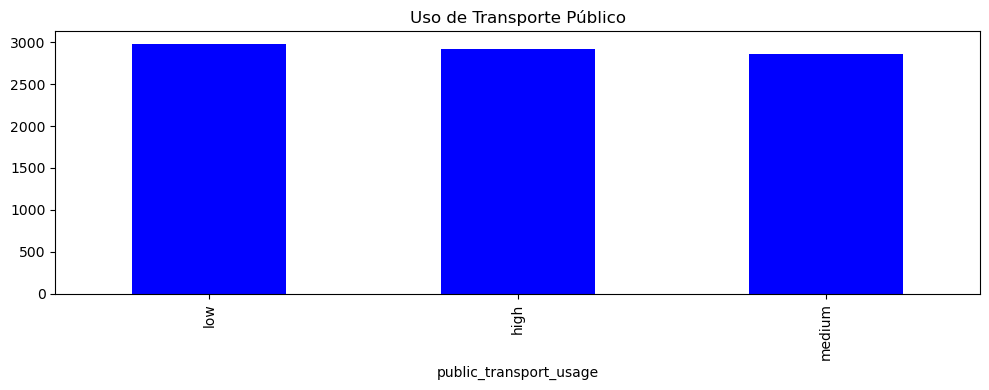

In [119]:
df_selecionado.public_transport_usage.value_counts().plot(kind='bar', title='Uso de Transporte Público', color= 'blue')

In [120]:
df_selecionado['bike_sharing_usage'].value_counts()

bike_sharing_usage
medium    4438
high      2893
low       1428
Name: count, dtype: int64

<Axes: title={'center': 'Uso de Bicicletas Compartilhadas'}, xlabel='bike_sharing_usage'>

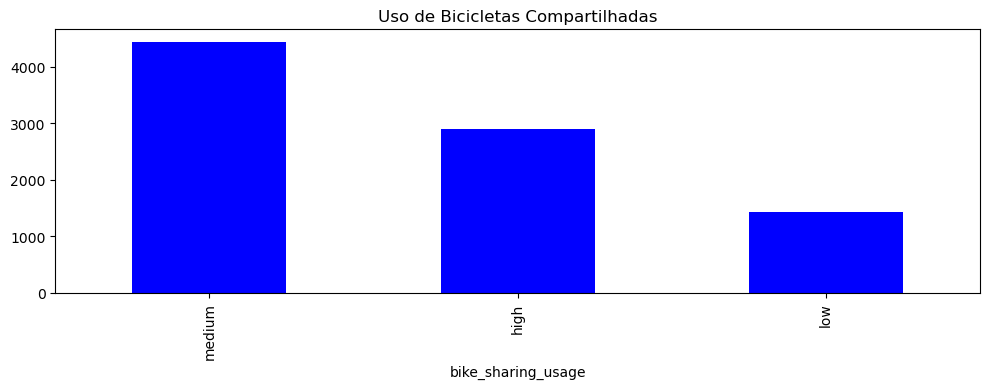

In [121]:
df_selecionado.bike_sharing_usage.value_counts().plot(kind='bar', title='Uso de Bicicletas Compartilhadas', color= 'blue')

In [122]:
df_selecionado['weather_conditions'].value_counts()

weather_conditions
Clear    2242
Fog      2229
Rain     2160
Snow     2128
Name: count, dtype: int64

<Axes: title={'center': 'Condição do Clima'}, xlabel='weather_conditions'>

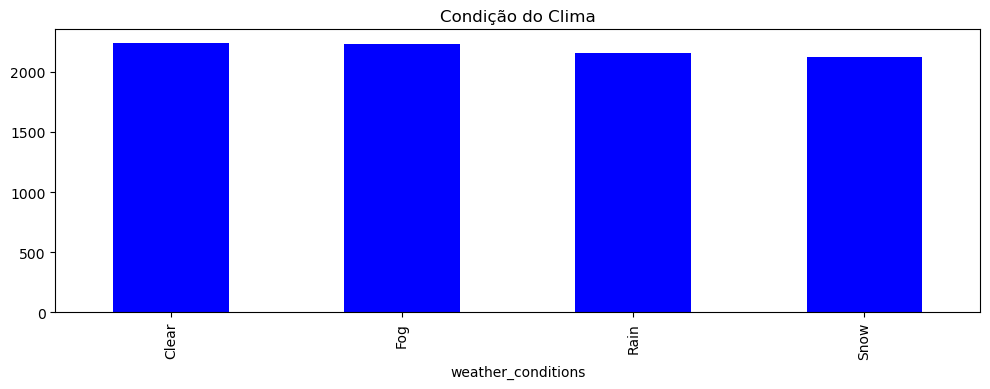

In [123]:
df_selecionado.weather_conditions.value_counts().plot(kind='bar', title='Condição do Clima', color= 'blue')

In [124]:
df_selecionado['holiday'].value_counts()

holiday
0    7839
1     920
Name: count, dtype: int64

<Axes: title={'center': 'Feriados'}, xlabel='holiday'>

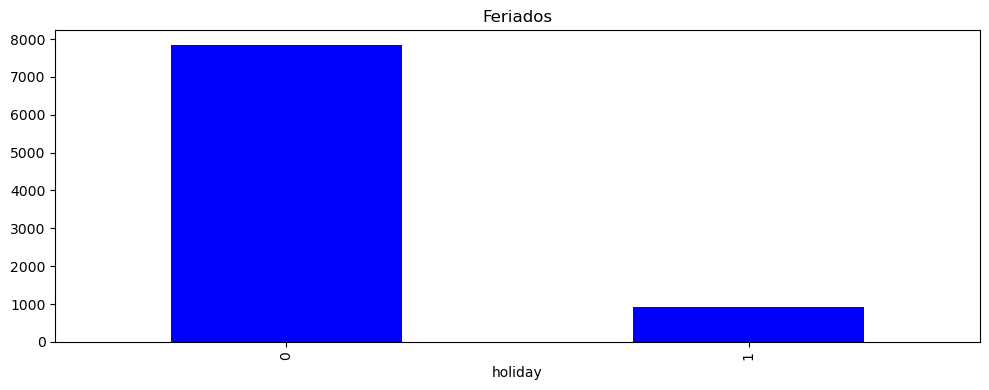

In [125]:
df_selecionado.holiday.value_counts().plot(kind='bar', title='Feriados', color= 'blue')

In [126]:
df_selecionado['event'].value_counts()

event
no event    7024
Sports       861
Festival     465
Concert      409
Name: count, dtype: int64

In [127]:
df_selecionado.columns

Index(['timestamp', 'public_transport_usage', 'traffic_flow',
       'bike_sharing_usage', 'pedestrian_count', 'weather_conditions',
       'day_of_week', 'holiday', 'event', 'temperature', 'humidity',
       'road_incidents', 'public_transport_delay', 'bike_availability',
       'pedestrian_incidents', 'hour'],
      dtype='object')

In [128]:
colunas = ['public_transport_usage', 'bike_sharing_usage', 'pedestrian_count', 'weather_conditions','day_of_week', 'holiday', 'event', 'temperature', 'humidity','road_incidents', 'public_transport_delay', 'bike_availability','pedestrian_incidents','traffic_flow',]

df_dados = pd.DataFrame(df_selecionado, columns=colunas)


In [129]:
df_dados.shape

(8759, 14)

In [130]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8759 entries, 1 to 8759
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   public_transport_usage  8759 non-null   category
 1   bike_sharing_usage      8759 non-null   category
 2   pedestrian_count        8759 non-null   int64   
 3   weather_conditions      8759 non-null   object  
 4   day_of_week             8759 non-null   object  
 5   holiday                 8759 non-null   int64   
 6   event                   8759 non-null   object  
 7   temperature             8759 non-null   category
 8   humidity                8759 non-null   int64   
 9   road_incidents          8759 non-null   int64   
 10  public_transport_delay  8759 non-null   category
 11  bike_availability       8759 non-null   int64   
 12  pedestrian_incidents    8759 non-null   int64   
 13  traffic_flow            8759 non-null   category
dtypes: category(5), int64(6), obj

In [131]:
plt.rcParams['figure.figsize'] = [10.00, 4.00]
plt.rcParams['figure.autolayout'] = True

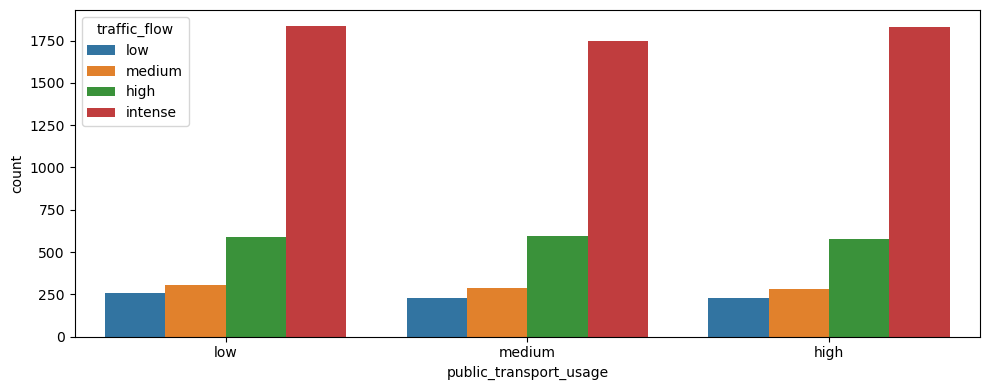

In [132]:
sns.countplot(data = df_dados, x = 'public_transport_usage', hue= 'traffic_flow')
plt.show()

In [133]:
variaveis_categoricas = ['public_transport_usage', 'bike_sharing_usage', 'weather_conditions', 'day_of_week', 'event', 'temperature', 'public_transport_delay']

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
lb = LabelEncoder()
for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [136]:
df_dados.head()

,public_transport_usage,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents,traffic_flow
1,2,2,688,3,3,0,3,1,99,3,2,88,2,intense
2,0,2,1774,2,3,0,3,0,34,6,2,93,2,intense
3,0,0,24,2,3,0,3,0,41,4,0,89,3,intense
4,2,0,224,3,3,0,3,0,45,3,1,49,3,low
5,2,1,36,1,3,0,3,2,60,6,2,38,0,intense


In [137]:
variavel_target = df_dados.traffic_flow.value_counts()
variavel_target

traffic_flow
intense    5422
high       1756
medium      874
low         707
Name: count, dtype: int64

In [138]:
PREDITORAS = df_dados.iloc[:, 0:13]  # Variáveis preditoras
TARGET = df_dados.iloc[:, 13]

In [139]:
from imblearn.over_sampling import SMOTE

In [140]:
seed = 100

balanceador = SMOTE(random_state=seed)

preditoras_res, target_res = balanceador.fit_resample(PREDITORAS, TARGET)

<Axes: title={'center': 'Distribuição de sobreviventes'}, xlabel='traffic_flow'>

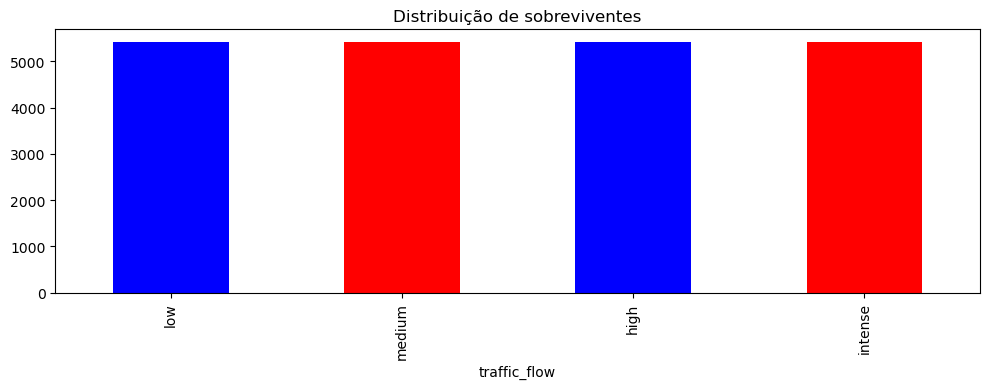

In [141]:
target_res.value_counts().plot(kind='bar', title='Distribuição de sobreviventes', color=['blue', 'red'])

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras_res, target_res, test_size=0.3, random_state=42)

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

In [146]:
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [147]:
randomForest = RandomForestClassifier()

In [148]:
'''
# Valores para o grid de hiperparametros
n_estimators = np.array([100,150,200,250,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])
#bootstrap = np.array(["True","False"])

# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)
                       #bootstrap = bootstrap)

# Criando o modelo com o Grid de Hiperparametros
randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])
'''

'\n# Valores para o grid de hiperparametros\nn_estimators = np.array([100,150,200,250,300])\nmax_depth = np.array([10,20])\ncriterion = np.array(["gini", "entropy"])\nmax_features = np.array(["sqrt", "log2", None])\nmin_samples_split = np.array([1,2,5])\nmin_samples_leaf = np.array([1,2,3])\n#bootstrap = np.array(["True","False"])\n\n# Grid de hiperparâmetros\ngrid_parametros = dict(n_estimators = n_estimators,\n                       max_depth = max_depth,\n                       criterion = criterion,\n                       max_features = max_features,\n                       min_samples_split = min_samples_split,\n                       min_samples_leaf = min_samples_leaf)\n                       #bootstrap = bootstrap)\n\n# Criando o modelo com o Grid de Hiperparametros\nrandomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)\n\n# Treinando os modelos\ninicio = time.time()\nrandomForest.fit(X_treino_normalizados, y_treino)\nfim = time.time()\n\n# Obtendo e v

In [149]:
!pip install scikeras[tensorflow]

In [150]:
'''
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import time

# Valores para o grid de hiperparâmetros
hidden_layer_sizes = [(50,), (100,), (50, 50), (100, 50)]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['adam', 'sgd', 'lbfgs']
alpha = np.logspace(-4, -1, 4)  # Taxa de regularização
learning_rate = ['constant', 'adaptive']

# Grid de hiperparâmetros
grid_parametros = dict(hidden_layer_sizes=hidden_layer_sizes,
                       activation=activation,
                       solver=solver,
                       alpha=alpha,
                       learning_rate=learning_rate)

# Criando o modelo com o Grid de Hiperparâmetros
mlp = MLPClassifier(max_iter=500, random_state=42)  # Base do modelo RNA
grid_search_rna = GridSearchCV(mlp, grid_parametros, cv=3, n_jobs=-1)

# Treinando os modelos
inicio = time.time()
grid_search_rna.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parâmetros treinados
treinos_rna = pd.DataFrame(grid_search_rna.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {grid_search_rna.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {grid_search_rna.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print("")
print("Número de treinamentos realizados: ", treinos_rna.shape[0])
'''

'\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\nimport pandas as pd\nimport time\n\n# Valores para o grid de hiperparâmetros\nhidden_layer_sizes = [(50,), (100,), (50, 50), (100, 50)]\nactivation = [\'identity\', \'logistic\', \'tanh\', \'relu\']\nsolver = [\'adam\', \'sgd\', \'lbfgs\']\nalpha = np.logspace(-4, -1, 4)  # Taxa de regularização\nlearning_rate = [\'constant\', \'adaptive\']\n\n# Grid de hiperparâmetros\ngrid_parametros = dict(hidden_layer_sizes=hidden_layer_sizes,\n                       activation=activation,\n                       solver=solver,\n                       alpha=alpha,\n                       learning_rate=learning_rate)\n\n# Criando o modelo com o Grid de Hiperparâmetros\nmlp = MLPClassifier(max_iter=500, random_state=42)  # Base do modelo RNA\ngrid_search_rna = GridSearchCV(mlp, grid_parametros, cv=3, n_jobs=-1)\n\n# Treinando os modelos\ninicio = time.time()\ngrid_search_rna.fit(

In [151]:
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import time
import pandas as pd

# Valores para o grid de hiperparâmetros
n_neighbors = np.array([3, 5, 7, 9, 11])
weights = np.array(["uniform", "distance"])
metric = np.array(["euclidean", "manhattan", "chebyshev", "minkowski"])

# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors=n_neighbors,
                       weights=weights,
                       metric=metric)

# Criando o modelo com o Grid de Hiperparâmetros
knn = GridSearchCV(KNeighborsClassifier(), grid_parametros, cv=3, n_jobs=8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parâmetros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print("")
print("Número de treinamentos realizados: ", treinos_knn.shape[0])
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\nimport time\nimport pandas as pd\n\n# Valores para o grid de hiperparâmetros\nn_neighbors = np.array([3, 5, 7, 9, 11])\nweights = np.array(["uniform", "distance"])\nmetric = np.array(["euclidean", "manhattan", "chebyshev", "minkowski"])\n\n# Grid de hiperparâmetros\ngrid_parametros = dict(n_neighbors=n_neighbors,\n                       weights=weights,\n                       metric=metric)\n\n# Criando o modelo com o Grid de Hiperparâmetros\nknn = GridSearchCV(KNeighborsClassifier(), grid_parametros, cv=3, n_jobs=8)\n\n# Treinando os modelos\ninicio = time.time()\nknn.fit(X_treino_normalizados, y_treino)\nfim = time.time()\n\n# Obtendo e visualizando os parâmetros treinados\ntreinos_knn = pd.DataFrame(knn.cv_results_)\n\n# Acurácia em Treino\nprint(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")\nprint("")\nprint(f"Hiperparâmetros Ideais: {knn.best_params_}

clf = RandomForestClassifier(n_estimators= 300, criterion= 'gini', max_depth= 20, max_features= 'None', min_samples_leaf= 1, min_samples_split= 2)

clf.fit(X_treino_normalizados, y_treino)
Hiperparâmetros Ideais: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

In [152]:
clf = RandomForestClassifier(n_estimators= 300, criterion= 'gini', max_depth= 20, max_features= None , min_samples_leaf= 1, min_samples_split= 2)

clf.fit(X_treino_normalizados, y_treino)


RandomForestClassifier(max_depth=20, max_features=None, n_estimators=300)

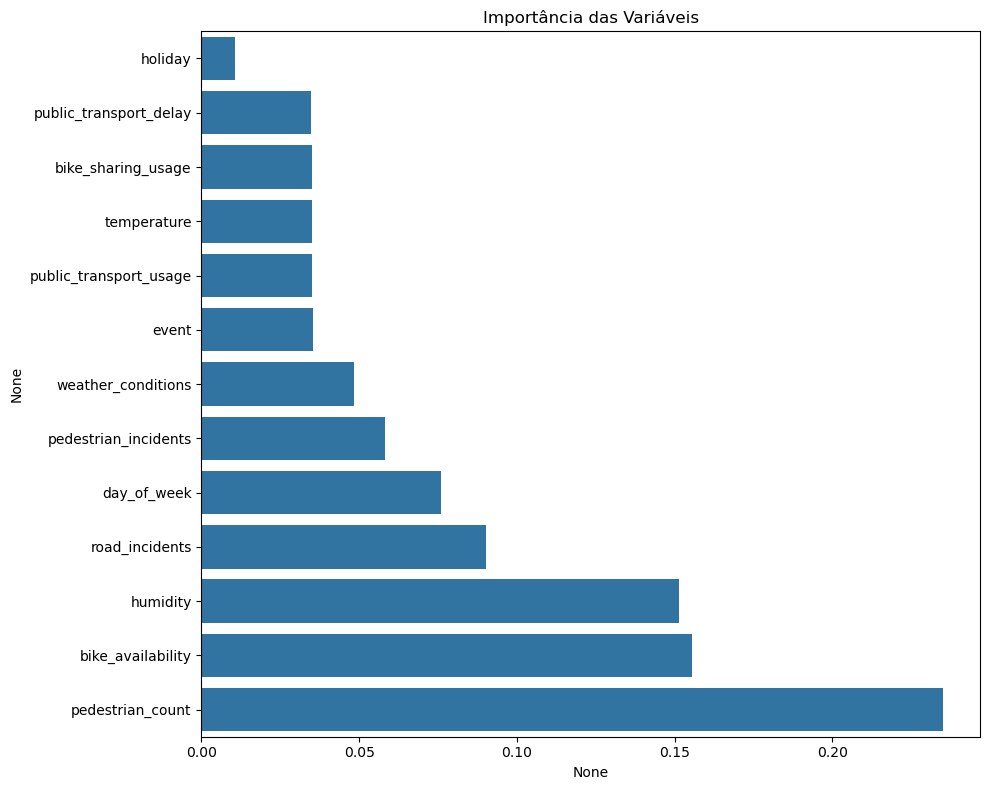

In [175]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending=True)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Importância das Variáveis")
plt.show()

In [153]:
scores = clf.score(X_teste_normalizados, y_teste)
print(f"Acurácia em Teste: {scores :.2%}")

Acurácia em Teste: 70.39%


In [154]:
from sklearn.metrics import accuracy_score

In [155]:
y_pred = clf.predict(X_teste_normalizados)
print(accuracy_score(y_teste, y_pred)*100)

70.38573843553097


In [156]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_teste, y_pred))

[[ 932  388  144  158]
 [ 255 1045  151  166]
 [  82  145 1335   80]
 [  92  165  101 1268]]


In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

        high       0.68      0.57      0.62      1622
     intense       0.60      0.65      0.62      1617
         low       0.77      0.81      0.79      1642
      medium       0.76      0.78      0.77      1626

    accuracy                           0.70      6507
   macro avg       0.70      0.70      0.70      6507
weighted avg       0.70      0.70      0.70      6507



In [158]:
cm = confusion_matrix(y_teste, y_pred)

print(cm)

[[ 932  388  144  158]
 [ 255 1045  151  166]
 [  82  145 1335   80]
 [  92  165  101 1268]]


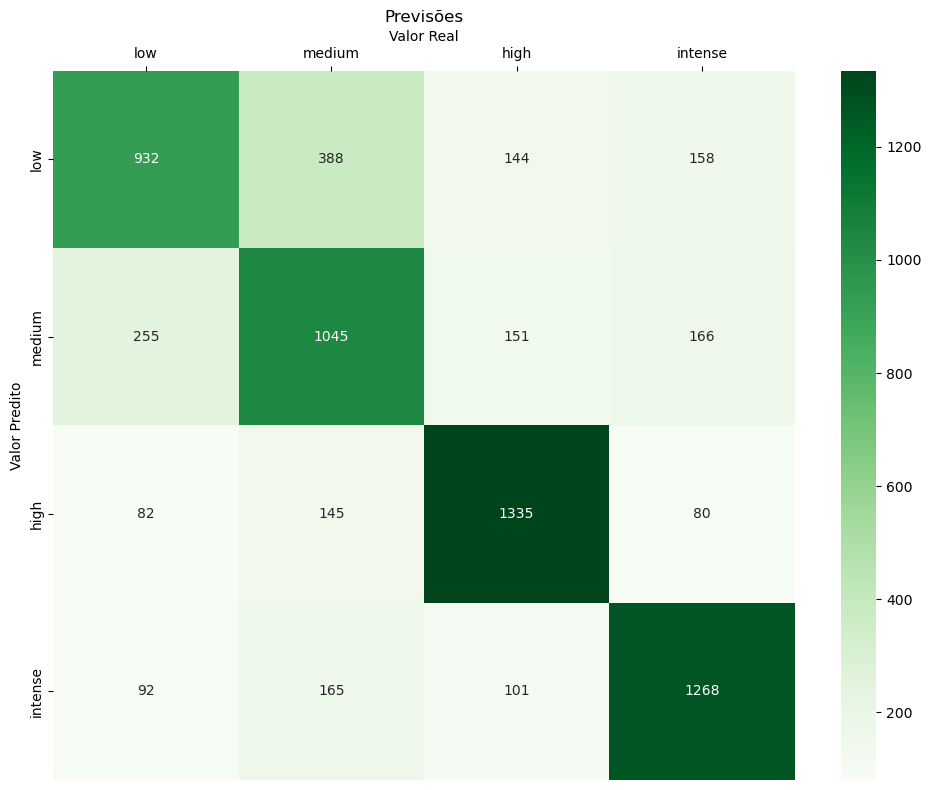

In [159]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, cmap = 'Greens', annot = True, cbar_kws = {"orientation" : "vertical"}, fmt = '.0f', xticklabels = ["low", "medium", "high", "intense"], yticklabels = ["low", "medium", "high", "intense"])

ax.set_ylabel('Valor Predito')
ax.set_xlabel('Valor Real')


ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

plt.title("Previsões")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom=False, bottom=False, top=True, labeltop=True)
plt.show()

In [160]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

# Treinando o modelo
knn.fit(X_treino_normalizados, y_treino)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

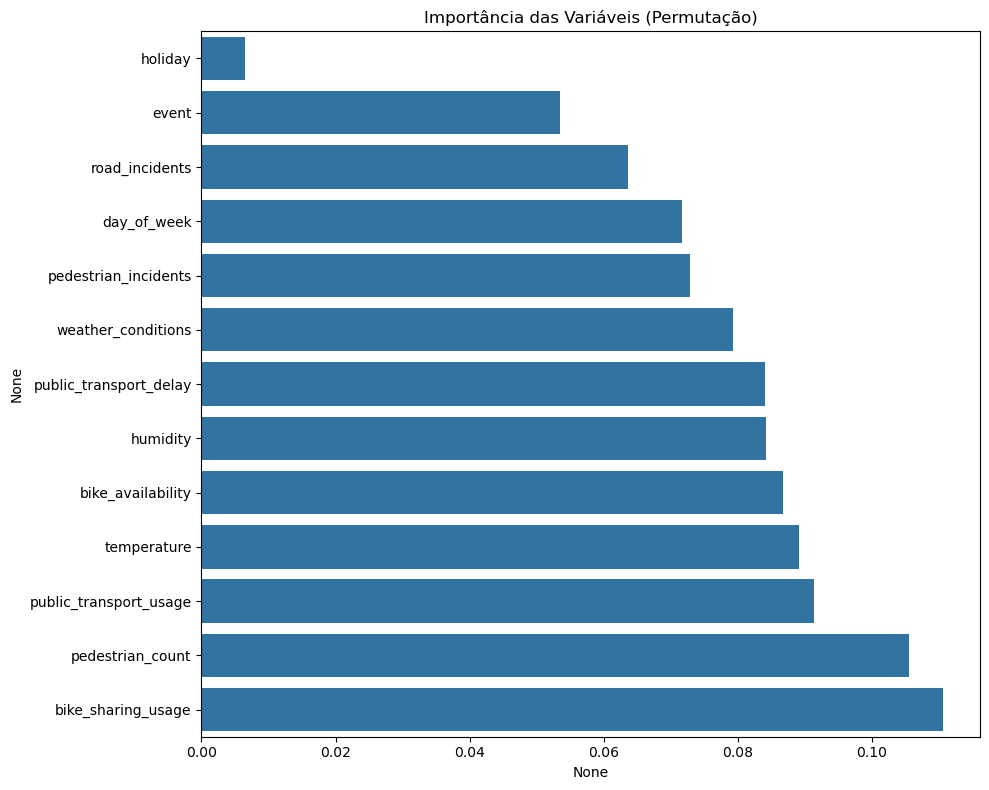

In [183]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_teste_normalizados, y_teste, n_repeats=10, random_state=0)
importances = pd.Series(data=result.importances_mean, index=PREDITORAS.columns)
importances.sort_values(ascending=True, inplace=True)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Importância das Variáveis (Permutação)")
plt.show()


In [161]:
scores = knn.score(X_teste_normalizados, y_teste)
print(f"Acurácia em Teste: {scores:.2%}")


Acurácia em Teste: 65.44%


In [162]:
# Fazendo previsões no conjunto de teste
y_pred = knn.predict(X_teste_normalizados)
print(f"Acurácia em Teste (métrica alternativa): {accuracy_score(y_teste, y_pred) * 100:.2f}%")


Acurácia em Teste (métrica alternativa): 65.44%


In [163]:
cm = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[ 972  207  223  220]
 [ 390  622  306  299]
 [  91   52 1380  119]
 [ 129   90  123 1284]]


In [164]:
print("Relatório de Classificação:")
print(classification_report(y_teste, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

        high       0.61      0.60      0.61      1622
     intense       0.64      0.38      0.48      1617
         low       0.68      0.84      0.75      1642
      medium       0.67      0.79      0.72      1626

    accuracy                           0.65      6507
   macro avg       0.65      0.65      0.64      6507
weighted avg       0.65      0.65      0.64      6507



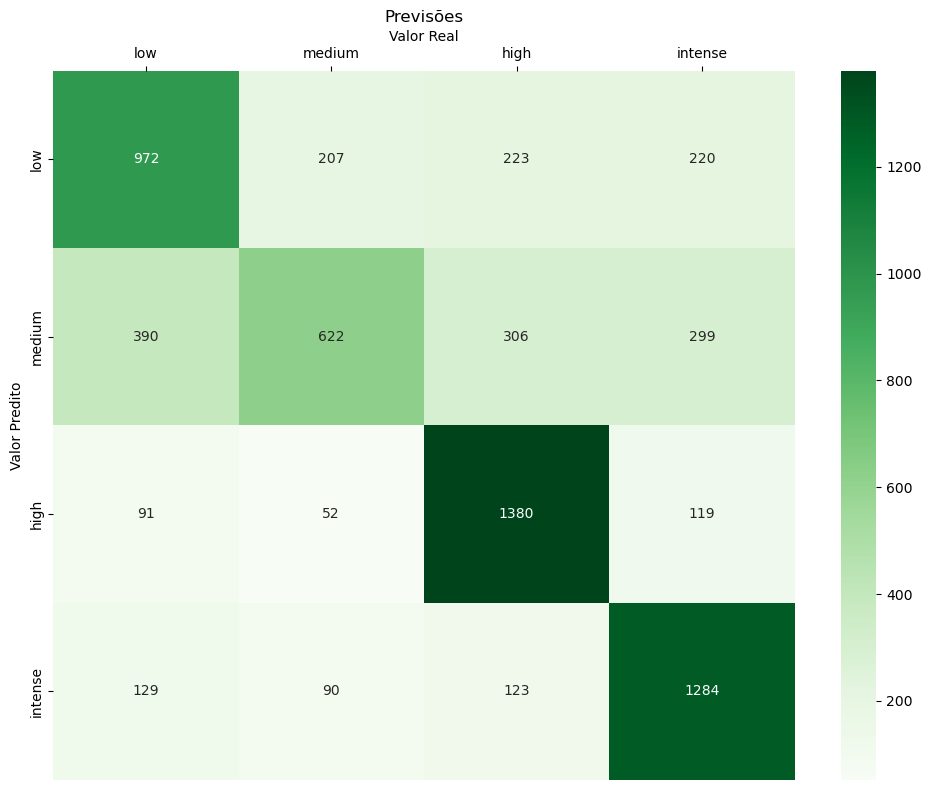

In [165]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, cmap = 'Greens', annot = True, cbar_kws = {"orientation" : "vertical"}, fmt = '.0f', xticklabels = ["low", "medium", "high", "intense"], yticklabels = ["low", "medium", "high", "intense"])

ax.set_ylabel('Valor Predito')
ax.set_xlabel('Valor Real')


ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

plt.title("Previsões")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom=False, bottom=False, top=True, labeltop=True)
plt.show()

In [167]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import time


mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Duas camadas ocultas com 100 e 50 neurônios
    activation='relu',            # Função de ativação
    solver='adam',                # Algoritmo de otimização
    alpha=0.01,                   # Regularização
    learning_rate='constant',     # Taxa de aprendizado adaptativa
    max_iter=500,                 # Máximo de iterações
    random_state=42               # Reprodutibilidade
)
# Treinando o modelo
mlp.fit(X_treino_normalizados, y_treino)

C:\Users\luana\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

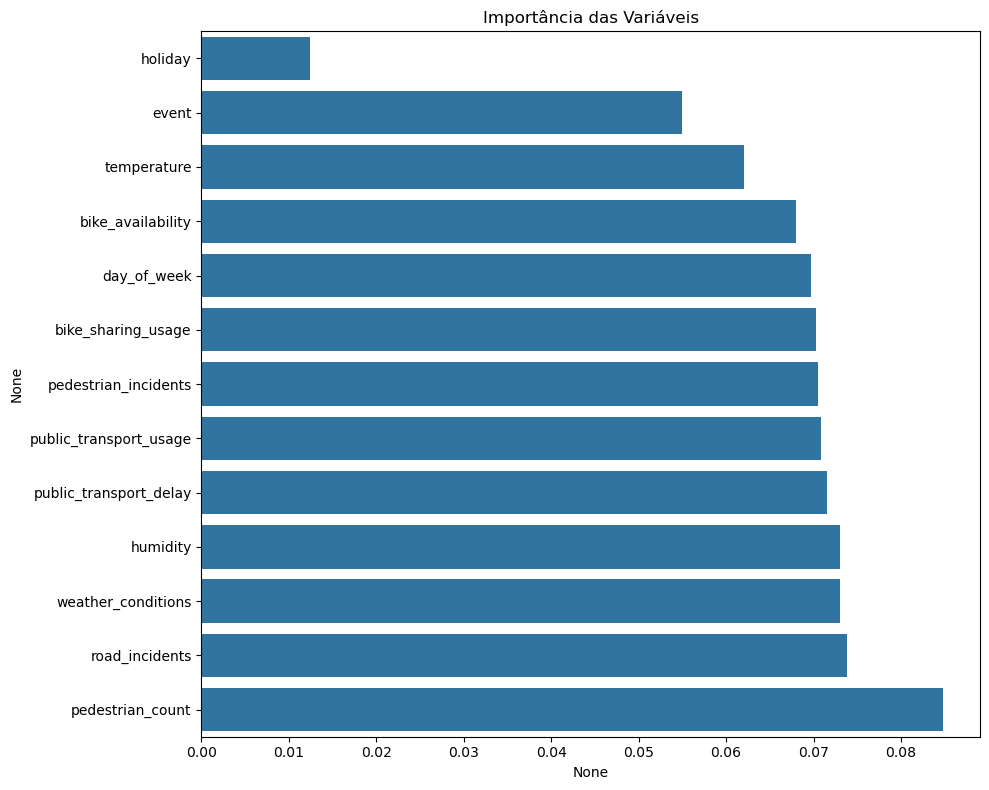

In [182]:
from sklearn.inspection import permutation_importance

# Calculando a importância das variáveis
result = permutation_importance(mlp, X_teste_normalizados, y_teste, n_repeats=30, random_state=0)

importances = pd.Series(data=result.importances_mean, index=PREDITORAS.columns)
importances = importances.sort_values(ascending=True)

# Plotando as importâncias
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Importância das Variáveis")
plt.show()


In [173]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True

importances = pd.Series(data=mlp.feature_importances_, index=preditoras.columns)
importances = importances.sort_values(ascending=True)
sns.barplot(x=importances, y=importances.index, orient='h').set_title("Importância das Variáveis")
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [168]:
scores = mlp.score(X_teste_normalizados, y_teste)
print(f"Acurácia em Teste: {scores:.2%}")

Acurácia em Teste: 50.24%


In [169]:
y_pred = mlp.predict(X_teste_normalizados)
print(f"Acurácia em Teste (métrica alternativa): {accuracy_score(y_teste, y_pred) * 100:.2f}%")

Acurácia em Teste (métrica alternativa): 50.24%


In [170]:
cm = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[703 390 162 367]
 [378 805 145 289]
 [319 204 766 353]
 [309 185 137 995]]


In [171]:
print("Relatório de Classificação:")
print(classification_report(y_teste, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

        high       0.41      0.43      0.42      1622
     intense       0.51      0.50      0.50      1617
         low       0.63      0.47      0.54      1642
      medium       0.50      0.61      0.55      1626

    accuracy                           0.50      6507
   macro avg       0.51      0.50      0.50      6507
weighted avg       0.51      0.50      0.50      6507



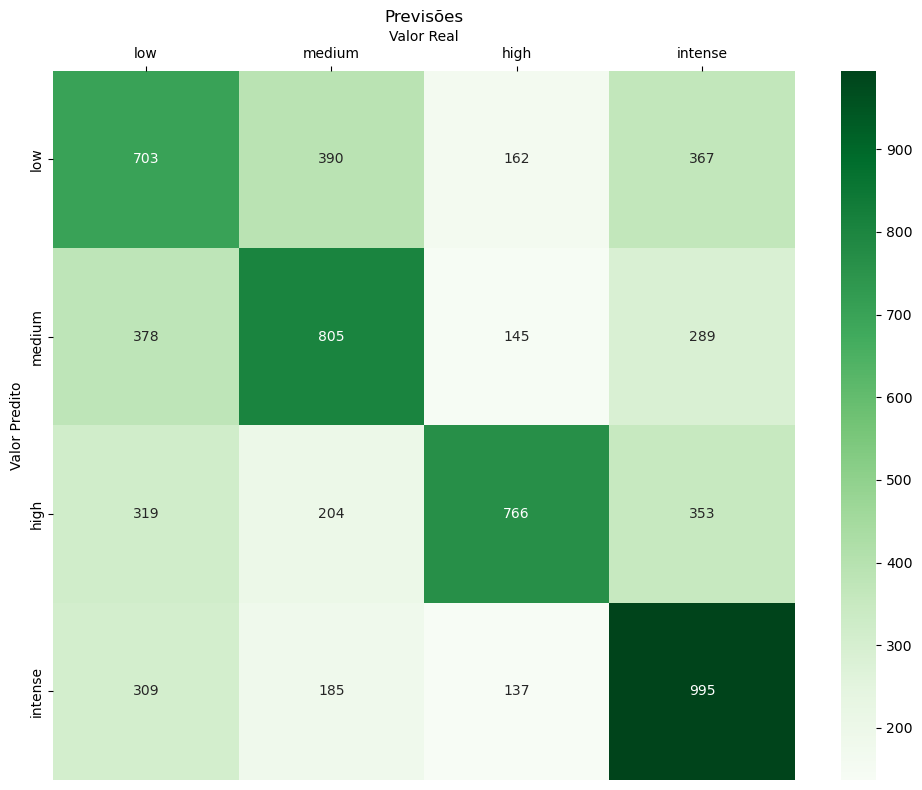

In [172]:
pd.options.display.float_format = '{:.2f}'.format

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.autolayout'] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, cmap = 'Greens', annot = True, cbar_kws = {"orientation" : "vertical"}, fmt = '.0f', xticklabels = ["low", "medium", "high", "intense"], yticklabels = ["low", "medium", "high", "intense"])

ax.set_ylabel('Valor Predito')
ax.set_xlabel('Valor Real')


ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')

plt.title("Previsões")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom=False, bottom=False, top=True, labeltop=True)
plt.show()